### Packages

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Added
import statsmodels.formula.api as smf
import ast # used for converting string lists to lists with string elements

### Functions

In [2]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    #df = df.dropna(subset=[dependent_variable, independent_variable])
    #df = df.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df, alpha=0.5)
    sns.regplot(x=independent_variable, y=dependent_variable, data=df, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.legend()
    plt.show()

In [3]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    #columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    #df = df.dropna(subset=columns_to_filter)
    #df = df.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())
    
    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

# Data import

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [4]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder + 'movie_cleaned_valid_budget.csv', lineterminator='\n')

FileNotFoundError: [Errno 2] No such file or directory: './data_cleaned/movie_cleaned_valid_budget.csv'

# Start Emma

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     73.13
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.90e-17
Time:                        16:42:53   Log-Likelihood:                -3856.0
No. Observations:                3011   AIC:                             7716.
Df Residuals:                    3009   BIC:                             7728.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.7409      1

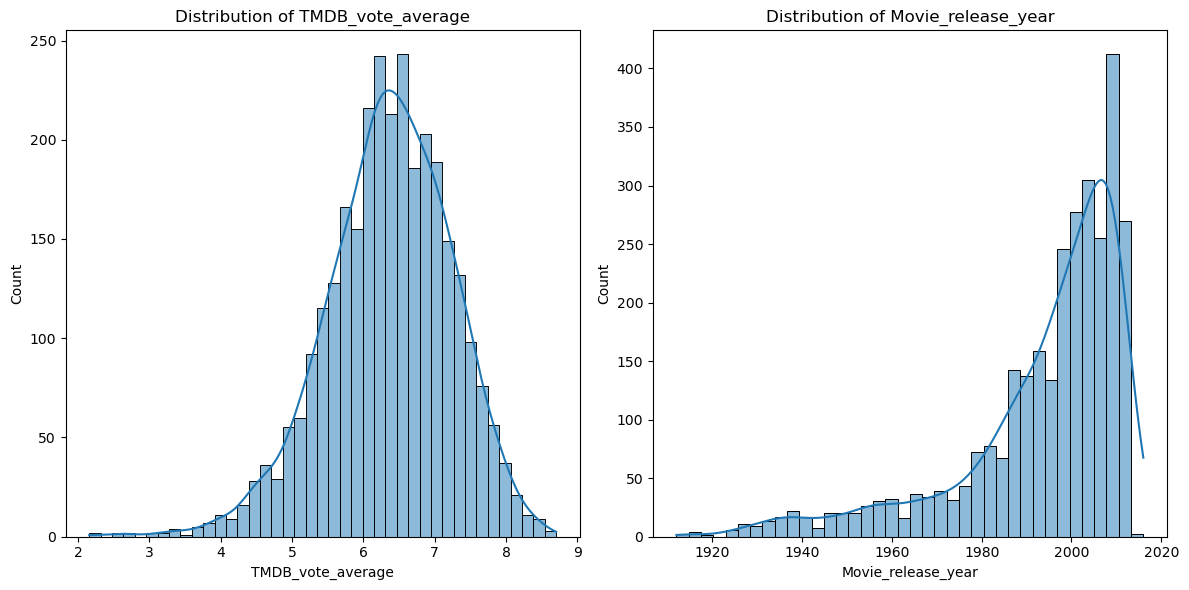

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


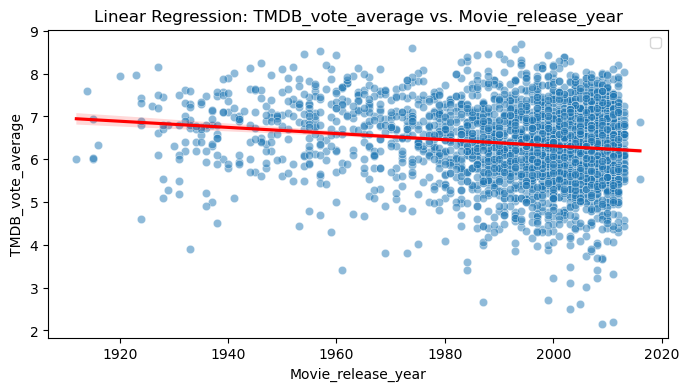

In [ ]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")


**Runtime**



                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     240.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.67e-52
Time:                        16:42:57   Log-Likelihood:                -3776.2
No. Observations:                3011   AIC:                             7556.
Df Residuals:                    3009   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2482      0.073     71.734

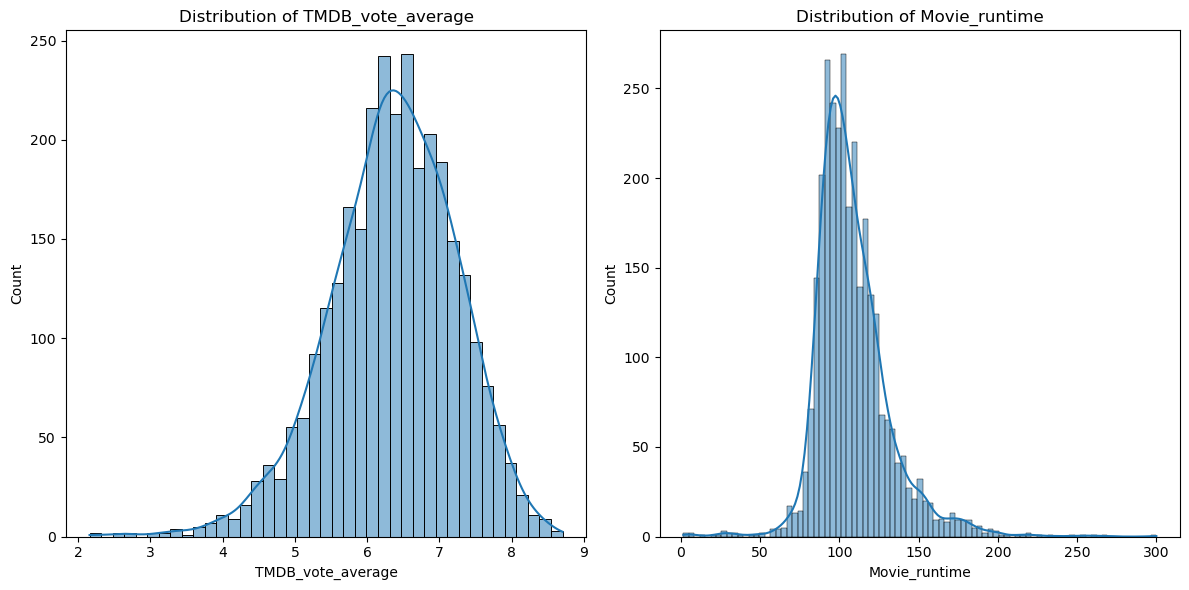

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


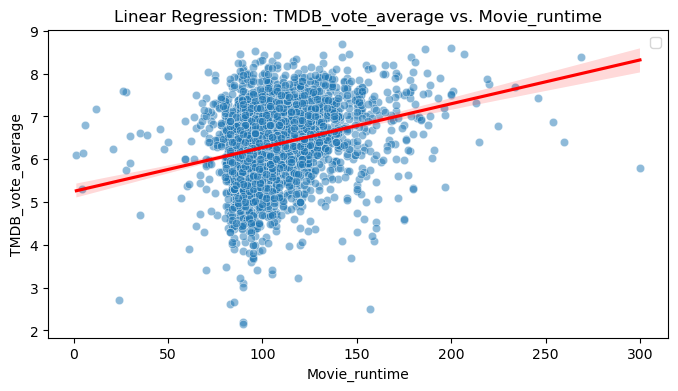

In [ ]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")

**Vote count log**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     794.6
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          2.46e-155
Time:                        16:43:01   Log-Likelihood:                -3539.4
No. Observations:                3011   AIC:                             7083.
Df Residuals:                    3009   BIC:                             7095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.9666    

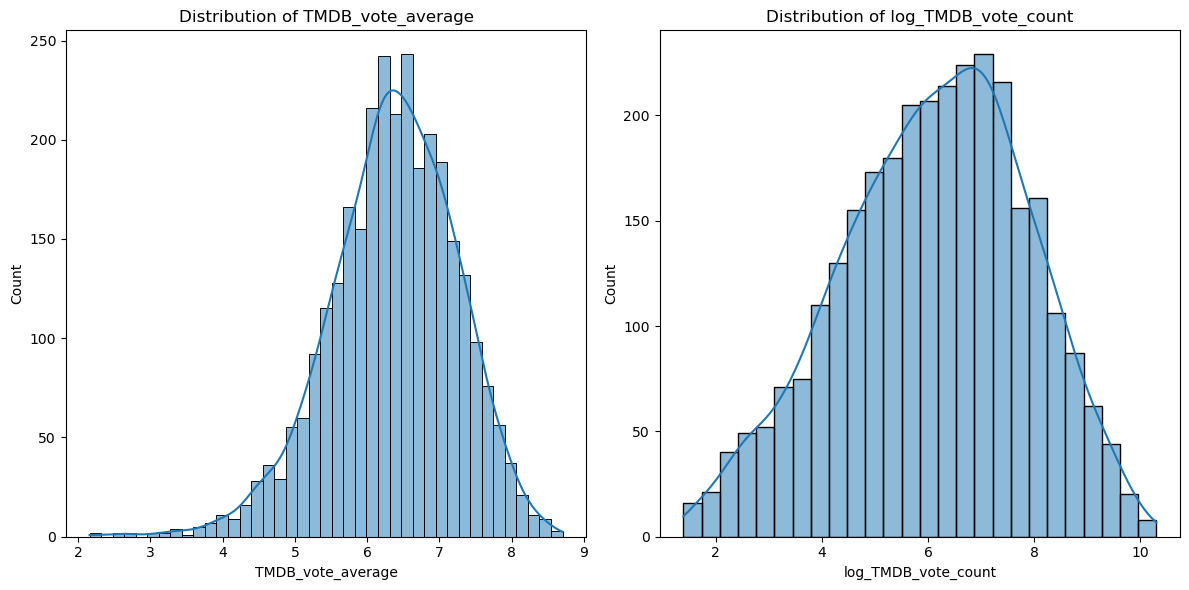

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


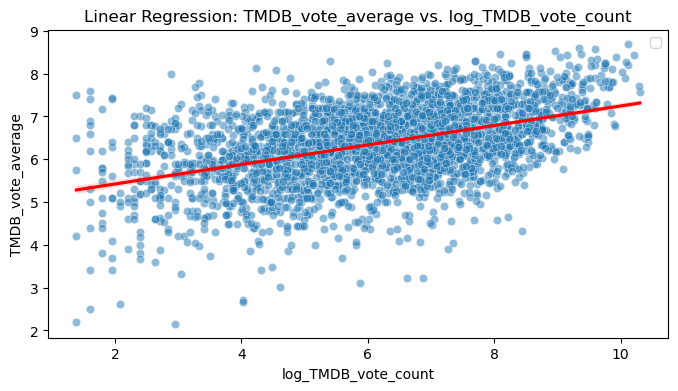

In [ ]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

**TMDB vote average vs log Movie box office revenue**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     169.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.18e-37
Time:                        16:43:03   Log-Likelihood:                -3809.8
No. Observations:                3011   AIC:                             7624.
Df Residuals:                    3009   BIC:                             7636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

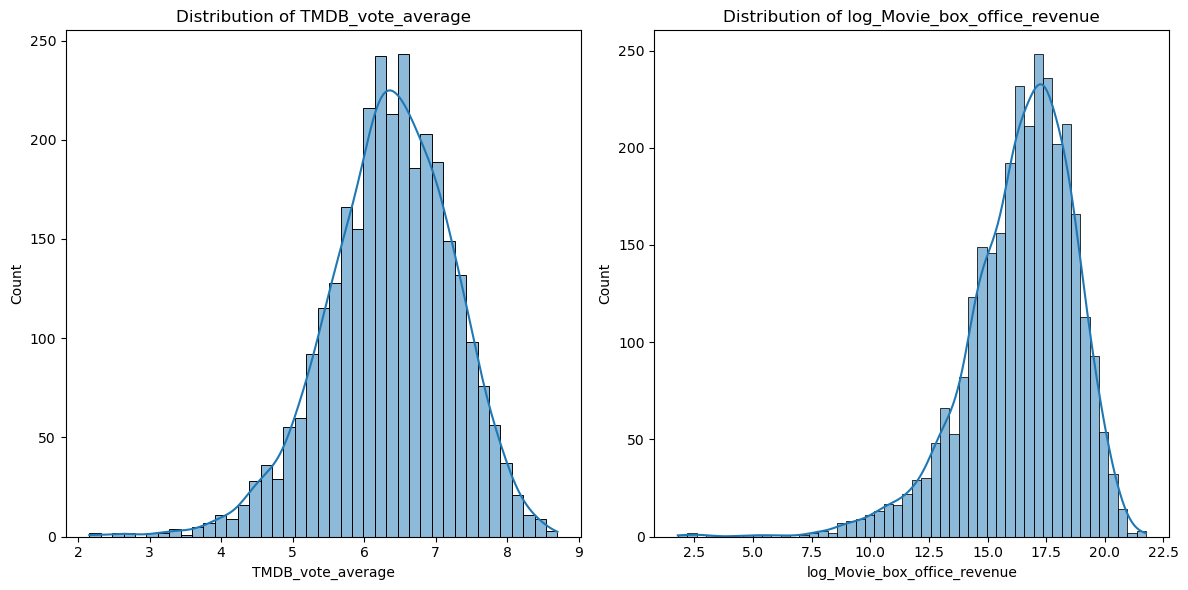

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


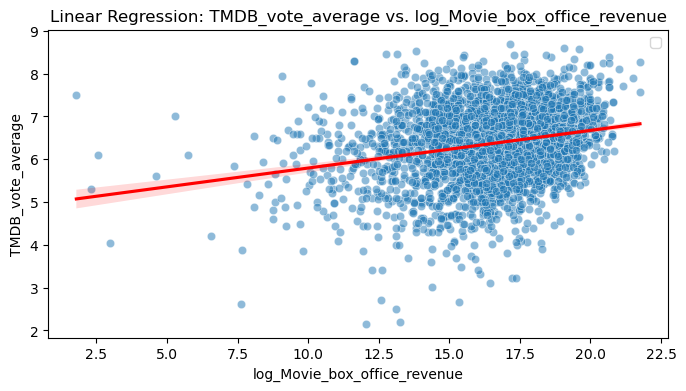

In [ ]:
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_Movie_box_office_revenue")

**TMDB vote average log movie box office revenue/log tmdb budget**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     278.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.17e-60
Time:                        16:43:05   Log-Likelihood:                -3759.1
No. Observations:                3011   AIC:                             7522.
Df Residuals:                    3009   BIC:                             7534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

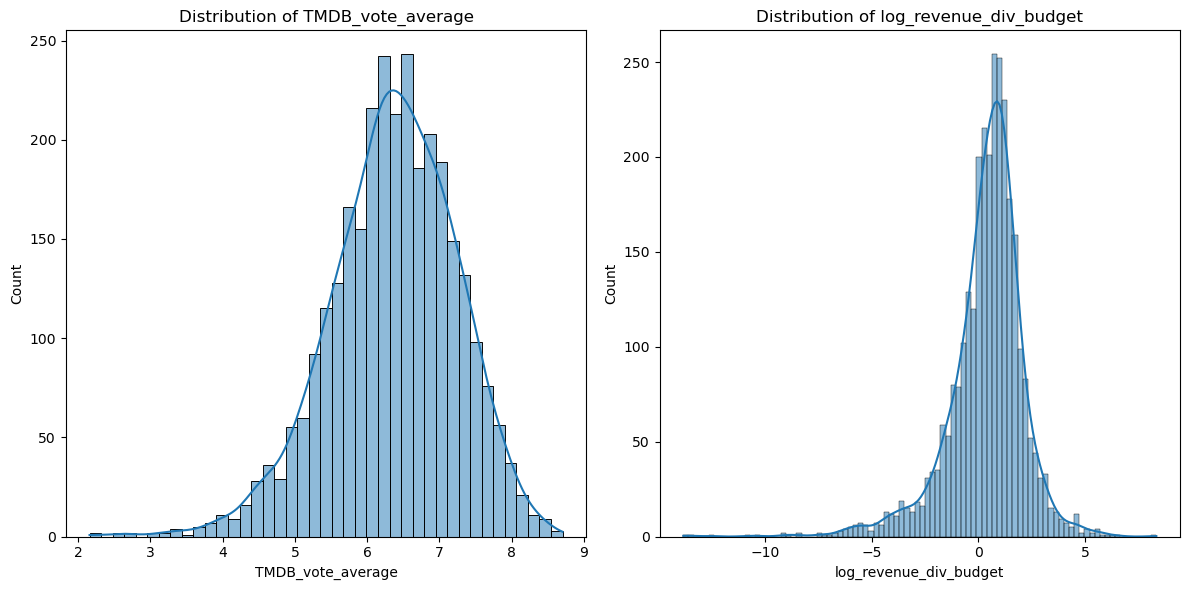

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


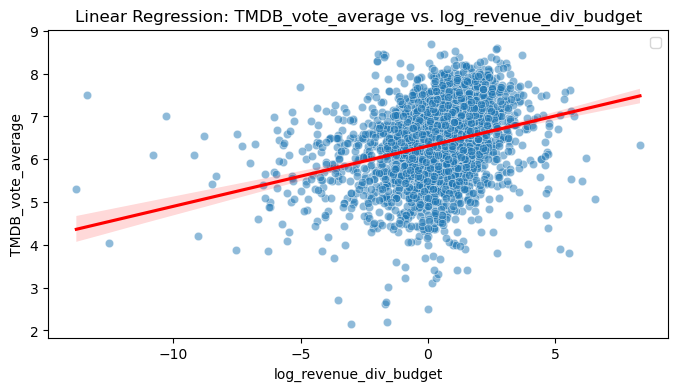

In [ ]:
movie_metadata['log_revenue_div_budget'] = np.log1p(
    (movie_metadata['Movie_box_office_revenue'] - movie_metadata['TMDB_budget']) / movie_metadata['TMDB_budget']
)
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_revenue_div_budget")

**Male actor percentage**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.22
Date:                Thu, 14 Dec 2023   Prob (F-statistic):            0.00140
Time:                        16:43:08   Log-Likelihood:                -3762.3
No. Observations:                2929   AIC:                             7529.
Df Residuals:                    2927   BIC:                             7541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.17

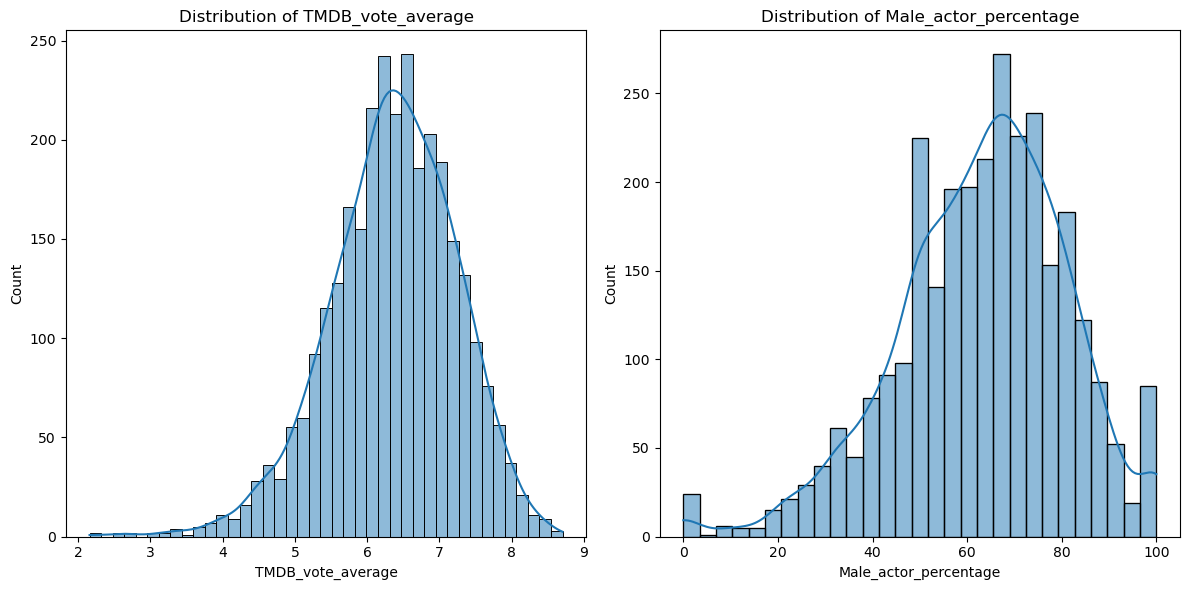

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


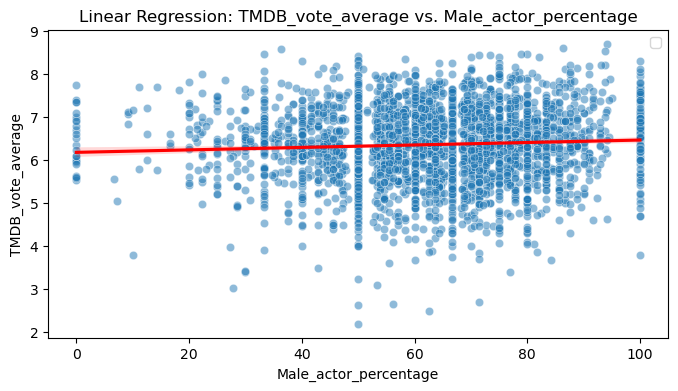

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Male_actor_percentage')

**Average age of actors**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04901
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.825
Time:                        16:43:10   Log-Likelihood:                -3654.0
No. Observations:                2844   AIC:                             7312.
Df Residuals:                    2842   BIC:                             7324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

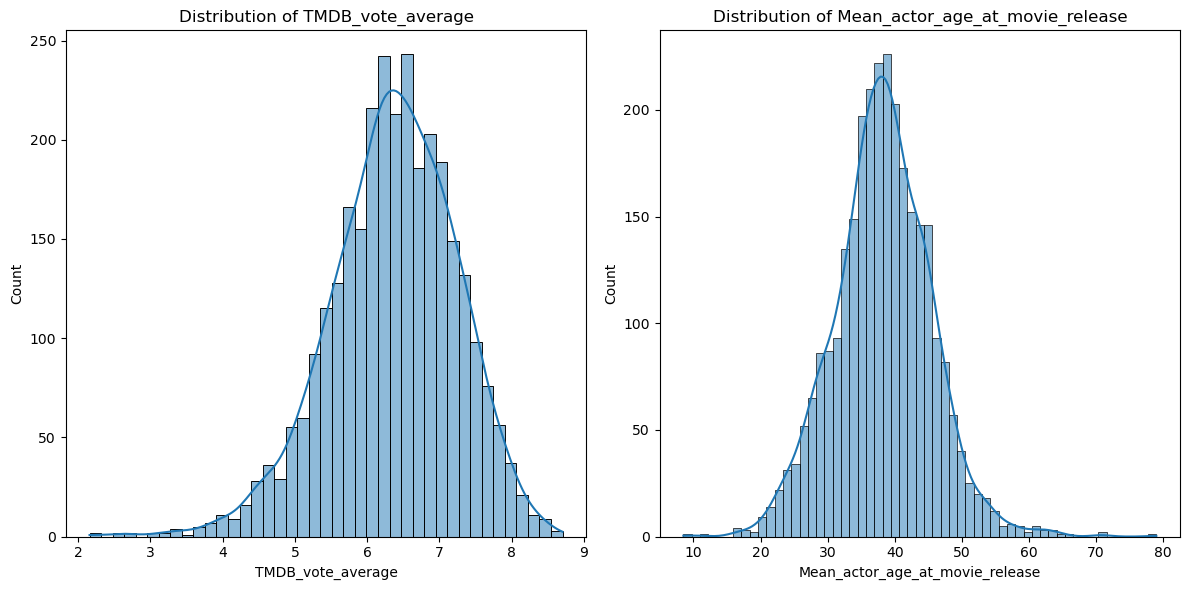

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


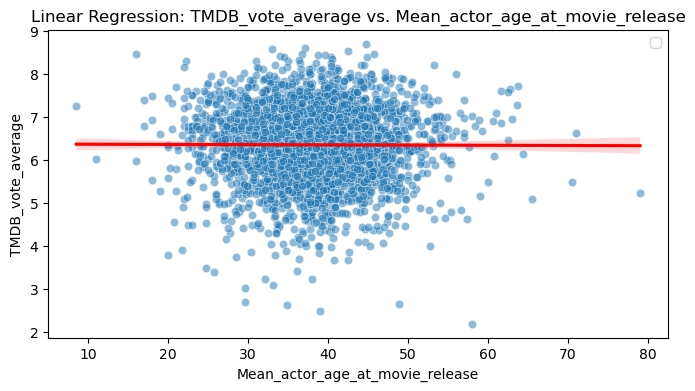

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Mean_actor_age_at_movie_release')

**Include categorical variables**

In [ ]:
categorical_columns = ['Movie_genres', 'Movie_languages', 'Movie_countries']

for column in categorical_columns:
    print(movie_metadata[column][0],"\n", type(movie_metadata[column][0]))
    movie_metadata.loc[:, column] = movie_metadata[column].apply(lambda x: ast.literal_eval(x))

print(movie_metadata[categorical_columns])

['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'] 
 <class 'list'>


ValueError: malformed node or string: ['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western']

In [ ]:
all_genres = {}
all_languages = {}
all_countries = {}

for col in categorical_columns:
    # Iterate over the values in the column
    for list_element in movie_metadata[col]:
        # Iterate over each element in the list
        for element in list_element:
            # Increment the count for the element in the respective dictionary
            if col == 'Movie_languages':
                all_languages[element] = all_languages.get(element, 0) + 1
            elif col == 'Movie_countries':
                all_countries[element] = all_countries.get(element, 0) + 1
            elif col == "Movie_genres":
                all_genres[element] = all_genres.get(element, 0) + 1

# Print the top N genres with the highest occurrences for each column
for occurrence_dict, column_name in zip([all_genres, all_languages, all_countries], categorical_columns):
    n = 10
    # Get the top N items with the highest occurrences (in descending order)
    top_n = sorted(occurrence_dict.items(), key=lambda x: x[1], reverse=True)[:n]

    print(f"\n\nTop {n} {column_name} with the highest occurrences:")
    for i, count in top_n:
        print(f"{i}: {count} occurrences")



Top 10 Movie_genres with the highest occurrences:
Drama: 1525 occurrences
Comedy: 1074 occurrences
Thriller: 863 occurrences
Action: 732 occurrences
Romance Film: 662 occurrences
Action/Adventure: 561 occurrences
Crime Fiction: 496 occurrences
Adventure: 452 occurrences
Horror: 368 occurrences
Indie: 332 occurrences


Top 10 Movie_languages with the highest occurrences:
English: 2603 occurrences
French: 225 occurrences
Spanish: 164 occurrences
German: 136 occurrences
Italian: 116 occurrences
Russian: 91 occurrences
Japanese: 74 occurrences
Hindi: 72 occurrences
Standard Mandarin: 52 occurrences
Cantonese: 38 occurrences


Top 10 Movie_countries with the highest occurrences:
United States of America: 2382 occurrences
United Kingdom: 376 occurrences
France: 221 occurrences
Germany: 216 occurrences
Canada: 134 occurrences
India: 113 occurrences
Italy: 78 occurrences
Australia: 77 occurrences
Japan: 65 occurrences
Spain: 48 occurrences


In [ ]:
formula_revenue = 'log_Movie_box_office_revenue ~ '
formula_rating = 'TMDB_vote_average ~ '

# top n occurring elements in categorical columns
n = 10
print(movie_metadata.shape)
for col in categorical_columns:
    # Flatten the lists, handling NaN values
    flattened_values = [item for sublist in movie_metadata[col].apply(lambda x: x if isinstance(x, list) else []).dropna() for item in sublist]

    # Count occurrences of each element
    element_counts = pd.Series(flattened_values).value_counts()

    # Select the top 10 most occurring elements
    top_elements = element_counts.head(n).index.tolist()

    # Create dummy variables only for the top 10 elements
    dummy_variables = pd.get_dummies(pd.Series(flattened_values).apply(lambda x: x if x in top_elements else 'Other'))

    # # Rename the dummy columns to avoid conflicts
    dummy_variables.columns = dummy_variables.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

    # Use the I() function to handle special characters in column names
    dummy_variables.columns = [f"{col}_{element}" for element in dummy_variables.columns]
    
    # Reset index before concatenation
    movie_metadata = movie_metadata.reset_index(drop=True)
    
    # Add dummy variables to the formula
    formula_revenue += ' + ' + ' + '.join(dummy_variables.columns)
    formula_rating += ' + ' + ' + '.join(dummy_variables.columns)
    
    # Merge the dummy variables with the original DataFrame
    movie_metadata = pd.merge(movie_metadata, dummy_variables, left_index=True, right_index=True)

# Print the updated formula
print(formula_revenue,
     "\n\n", formula_rating,
     "\n\n", dummy_variables.shape, movie_metadata.shape)

(3011, 65)
log_Movie_box_office_revenue ~  + Movie_genres_Action + Movie_genres_Action_Adventure + Movie_genres_Adventure + Movie_genres_Comedy + Movie_genres_Crime_Fiction + Movie_genres_Drama + Movie_genres_Horror + Movie_genres_Indie + Movie_genres_Other + Movie_genres_Romance_Film + Movie_genres_Thriller + Movie_languages_Cantonese + Movie_languages_English + Movie_languages_French + Movie_languages_German + Movie_languages_Hindi + Movie_languages_Italian + Movie_languages_Japanese + Movie_languages_Other + Movie_languages_Russian + Movie_languages_Spanish + Movie_languages_Standard_Mandarin + Movie_countries_Australia + Movie_countries_Canada + Movie_countries_France + Movie_countries_Germany + Movie_countries_India + Movie_countries_Italy + Movie_countries_Japan + Movie_countries_Other + Movie_countries_Spain + Movie_countries_United_Kingdom + Movie_countries_United_States_of_America 

 TMDB_vote_average ~  + Movie_genres_Action + Movie_genres_Action_Adventure + Movie_genres_Adve

In [ ]:
model_revenue = smf.ols(formula=formula_revenue, data=movie_metadata)
model_rating = smf.ols(formula=formula_rating, data=movie_medata)

PatsyError: Error evaluating factor: NameError: name 'Movie_genres_Action' is not defined
    log_Movie_box_office_revenue ~  + Movie_genres_Action + Movie_genres_Action_Adventure + Movie_genres_Adventure + Movie_genres_Comedy + Movie_genres_Crime_Fiction + Movie_genres_Drama + Movie_genres_Horror + Movie_genres_Indie + Movie_genres_Other + Movie_genres_Romance_Film + Movie_genres_Thriller + Movie_languages_Cantonese + Movie_languages_English + Movie_languages_French + Movie_languages_German + Movie_languages_Hindi + Movie_languages_Italian + Movie_languages_Japanese + Movie_languages_Other + Movie_languages_Russian + Movie_languages_Spanish + Movie_languages_Standard_Mandarin + Movie_countries_Australia + Movie_countries_Canada + Movie_countries_France + Movie_countries_Germany + Movie_countries_India + Movie_countries_Italy + Movie_countries_Japan + Movie_countries_Other + Movie_countries_Spain + Movie_countries_United_Kingdom + Movie_countries_United_States_of_America
                                      ^^^^^^^^^^^^^^^^^^^

In [ ]:
movie_metadata

,Unnamed: 0,Unnamed:_0,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,...,Movie_countries_Canada_y,Movie_countries_France_y,Movie_countries_Germany_y,Movie_countries_India_y,Movie_countries_Italy_y,Movie_countries_Japan_y,Movie_countries_Other_y,Movie_countries_Spain_y,Movie_countries_United_Kingdom_y,Movie_countries_United_States_of_America_y
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",...,False,False,False,False,False,False,False,False,False,True
1,1,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,[English],[United States of America],"[Musical, Comedy, Black-and-white]",...,False,False,False,False,False,False,False,False,False,True
2,2,13,171005,/m/016ywb,Henry V,1989-11-08,137.0,[English],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",...,False,False,False,False,False,False,False,False,True,False
3,3,17,77856,/m/0kcn7,Mary Poppins,1964-08-27,139.0,[English],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",...,False,False,False,False,False,False,False,False,False,True
4,5,29,156558,/m/014k4y,Baby Boy,2001-06-27,123.0,[English],[United States of America],"[Crime Fiction, Drama, Coming of age]",...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,5101,35722,35976870,/m/0j_56dn,The Double,2012,98.0,[English],[United Kingdom],[Comedy film],...,False,False,False,False,False,False,False,False,True,False
3007,5102,35731,3232438,/m/0902by,The Candidate,1972-06-29,110.0,[English],[United States of America],"[Parody, Political cinema, Drama, Political dr...",...,False,False,True,False,False,False,False,False,False,False
3008,5106,35747,8181832,/m/026vgxt,A Guide for the Married Man,1967-05-25,89.0,[English],[United States of America],"[Romantic comedy, Sex comedy, Romance Film, Co...",...,False,False,False,True,False,False,False,False,False,False
3009,5107,35759,22411588,/m/05sz1k3,The First Day of the Rest of Your Life,2008,114.0,[French],[France],"[Drama, World cinema]",...,False,False,False,False,False,False,False,False,False,True
